# sample puzzles 2 label

In [77]:
import numpy as np
import json
import matplotlib.pyplot as plt
path = "/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path, 'r') as f:
    data = json.load(f)
list_prg=[puz["program_str"] for puz in data]
for puzz in data:
    
    emb=np.array(puzz["emb"],dtype=int).tolist()
    puzz["emb"]=emb

In [78]:
(all_emb.sum(axis=1)==0).sum()

86

Text(0.5, 1.0, 'number of puzzle per skill (trainset)')

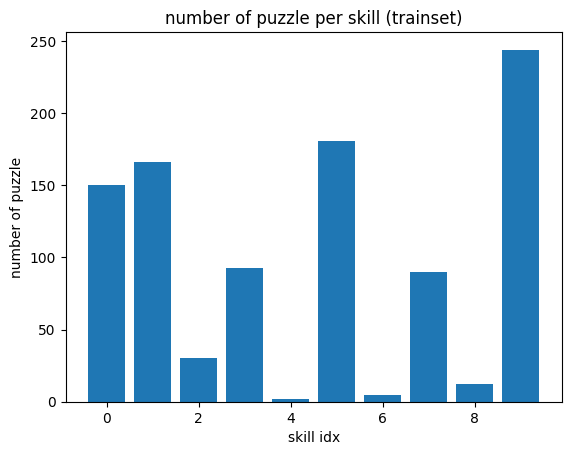

In [81]:
all_emb= [puzz["emb"] for puzz in data]
all_emb=np.array(all_emb,dtype=int)
sum_emb=np.sum(all_emb,axis=0)
plt.bar(np.arange(10),sum_emb)
plt.xlabel("skill idx")
plt.ylabel("number of puzzle")
plt.title("number of puzzle per skill (trainset)")

In [76]:
import numpy as np
import json
import copy
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=1)
list_puzzle_2_label=[]
list_label=np.array([0. for _ in range((10))])

path = "/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path, 'r') as f:
    data = json.load(f)
list_prg=[puz["program_str"] for puz in data]
list_emb=[puz["emb"] for puz in data]
idx_uniform=rng.choice(len(data), 30, replace=False)
idx_uniform = np.sort(idx_uniform)[::-1]
print(len(data))
for idx_unif in idx_uniform:
    list_puzzle_2_label.append(copy.deepcopy(data[idx_unif]))
    list_label-=np.array(data[idx_unif]["emb"])
    del data[idx_unif]
print(len(data))

for idx_del,puzz in enumerate(data):
    
    emb=np.array(puzz["emb"],dtype=int).tolist()
    puzz["emb"]=emb
    if np.sum(emb)==10:# 10 skills is often a bug
        del data[idx_del]
print(len(data))


while len(list_puzzle_2_label)<60:
    idx_shuffle=np.array([i for i in range(len(data))])
    rng.shuffle(idx_shuffle)
    for choosen_idx in idx_shuffle:
        if len(list_puzzle_2_label)>=60:
            break
        #choose idx2aim (lowest skills sampled)
        all_emb= [puzz["emb"] for puzz in data]
        all_emb=np.array(all_emb,dtype=int)
        sum_emb=np.sum(all_emb,axis=0)
        sort_idx=list(np.argsort(list_label)[::-1])
        for idx2sample in sort_idx:
            if sum_emb[idx2sample]>0:
                break
        puzzle=data[choosen_idx]
        emb=puzzle["emb"]
        if emb[idx2sample]==1:
            list_puzzle_2_label.append(puzzle)
            list_label-=np.array(emb)
            del data[choosen_idx]
            break
        
all_emb= [puzz["emb"] for puzz in data]
all_emb=np.array(all_emb,dtype=int)
sum_emb=np.sum(all_emb,axis=0)

list_label,sum_emb


536
506
506


(array([-13., -14., -14., -14.,  -2., -18.,  -5., -16., -12., -28.]),
 array([137, 152,  16,  79,   0, 163,   0,  74,   0, 216]))

In [ ]:
(subset2label)

Text(0.5, 1.0, 'number of puzzle per skill (subset2label)')

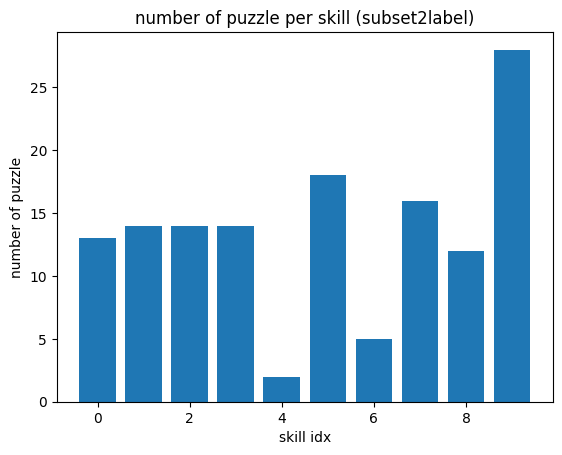

In [82]:
plt.bar([i for i in range(10)],-list_label)
plt.xlabel("skill idx")
plt.ylabel("number of puzzle")
plt.title("number of puzzle per skill (subset2label)" )

In [ ]:
# save
list_puzzle_2_label
path = "/media/data/flowers/OpenELM/tests/subset2label.json"
with open(path, 'w') as f:
    json.dump(list_puzzle_2_label,f,indent=4)



In [85]:
#load
list_puzzle_2_label
path = "/media/data/flowers/OpenELM/tests/subset2label.json"
with open(path, 'r') as f:
    data2label = json.load(f)

In [87]:
#split in two
data2label_jul = data2label[:30]
data2label_lae = data2label[30:]
# save

path = "/media/data/flowers/OpenELM/tests/subset2label_jul.json"
with open(path, 'w') as f:
    json.dump(data2label_jul,f,indent=4)
path = "/media/data/flowers/OpenELM/tests/subset2label_lae.json"
with open(path, 'w') as f:
    json.dump(data2label_lae,f,indent=4)

60

In [ ]:
1155    1472   
1406    1268  
1117

In [ ]:
for idx in range(len(data2label)):
    if not ("GT_emb" in data2label[idx].keys()):
        print(data2label[idx]["program_str"])
        
        data2label[idx]["GT_emb"]

    data2label["program_str"]

In [ ]:
import numpy as np

truth_labels = [
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
]

detected_labels = [
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
]



# number of labels
n_labels = len(truth_labels[0])

# initialize matrix
matrix = np.zeros((n_labels, n_labels))

# count for each ground truth label
label_counts = np.zeros(n_labels)



for truth, detected in zip(truth_labels, detected_labels):
    for i in range(n_labels):
        if truth[i] == 1:
            label_counts[i] += 1
            for j in range(n_labels):
                if detected[j] == 1:
                    matrix[i][j] += 1

# Normalize
for i in range(n_labels):
    if label_counts[i] != 0:
        matrix[i] = matrix[i] / label_counts[i]

print(matrix)


In [ ]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]


In [ ]:
import itertools
def generate_vectors(n):
    return [list(p) for p in itertools.product([0, 1], repeat=n)]

vectors = generate_vectors(10)
for vector in vectors:
    print(vector)
dic={str(vector): [] for vector in vectors}